In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [26]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

/home/ubuntu/.keras/datasets/cats_and_dogs_filtered


In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 1000 images belonging to 2 classes.


In [13]:
sample_training_images, _ = next(train_data_gen)


In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


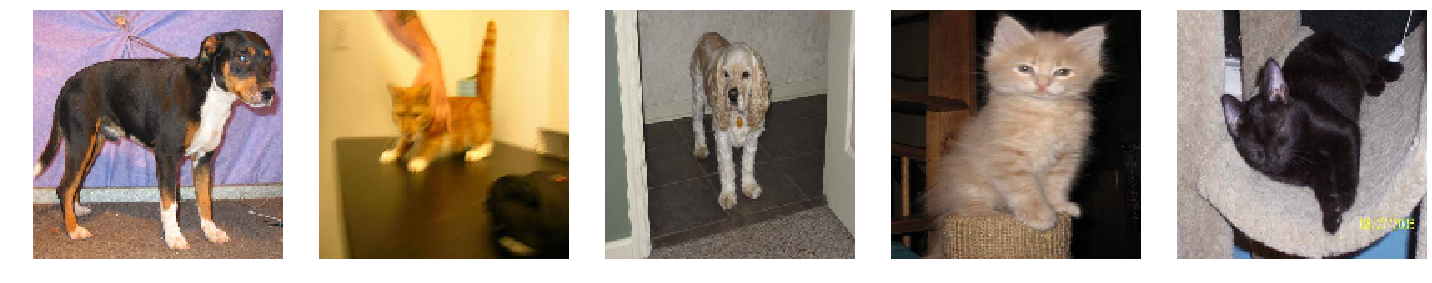

In [15]:
plotImages(sample_training_images[:5])


In [55]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [57]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20736)            

In [58]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 8s 529ms/step - loss: 0.9485 - acc: 0.4963 - val_loss: 0.6893 - val_acc: 0.5011
Epoch 2/15
15/15 [==============================] - 8s 528ms/step - loss: 0.6885 - acc: 0.5160 - val_loss: 0.6840 - val_acc: 0.5011
Epoch 3/15
15/15 [==============================] - 8s 506ms/step - loss: 0.6590 - acc: 0.5678 - val_loss: 0.6525 - val_acc: 0.6864
Epoch 4/15
15/15 [==============================] - 7s 486ms/step - loss: 0.6207 - acc: 0.6357 - val_loss: 0.6102 - val_acc: 0.6172
Epoch 5/15
15/15 [==============================] - 7s 457ms/step - loss: 0.5383 - acc: 0.7153 - val_loss: 0.5695 - val_acc: 0.6696
Epoch 6/15
15/15 [==============================] - 7s 440ms/step - loss: 0.5226 - acc: 0.7190 - val_loss: 0.5874 - val_acc: 0.6752
Epoch 7/15
15/15 [==============================] - 6s 428ms/step - loss: 0.4522 - acc: 0.7760 - val_loss: 0.5470 - val_acc: 0.7031
Epoch 8/15
15/15 [==============================] - 6s 412ms/step - loss: 0.

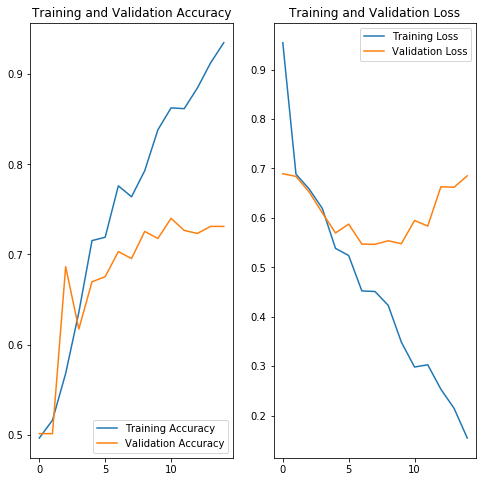

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [60]:
model.save('cdm.h5')

In [61]:
#from keras.models import load_model

model = tf.keras.models.load_model('cdm.h5')

In [64]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150, 150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 150, 150, 3)
	# center pixel data
	img = img.astype('uint8')
	
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('dog.jpg')
	# load model
	model = tf.keras.models.load_model('cdm.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result)
	print(result[0])
 
# entry point, run the example
run_example()

[[1]]
[1]
